In [23]:
import pandas as pd

# Alimentando o código com o CSV
df = pd.read_csv('https://raw.githubusercontent.com/gabrooo/CP_I_IA_-_Machine_Learning/main/CSV/urls_phishing_checkpoint1.csv')

# Separa o dataframe em 2 subconjuntos
# 1 = phishing
# 0 = legítima

df_phishing = df[df['phishing'] == 1]
df_legit = df[df['phishing'] == 0]

# declarando a seed p/ amostragem
random_state = 2048

# Selecionar uma amostra de 4000 observações
sample_phishing = df_phishing.sample(n=2000, random_state=random_state)
sample_legit = df_legit.sample(n=2000, random_state=random_state)

# Concatena as 2 amostras
sample_df = pd.concat([sample_phishing, sample_legit])

# Exibirá o top 5 da amostra
sample_df.head()

,urls,phishing,domain,ip,at,length_url,depth_url,double_slash,http_https,shortening_services,hyphen,dns,age_domain,end_period_domain,country
2812,https://us-usps-addio.top/,1,us-usps-addio.top,1,0,26,1,0,0,0,1,1,0.0,2025-08,Australia
250,https://identifiez-vous250.godaddysites.com/,1,identifiez-vous250.godaddysites.com,1,0,44,1,0,0,0,1,1,10.0,2032-11,South_Africa
2492,https://chrme-metsmsk-usa.gitbook.io/us,1,chrme-metsmsk-usa.gitbook.io,1,0,39,1,0,0,0,1,1,10.0,2025-03,Canada
2241,https://new.express.adobe.com/webpage/fLs7ZQKV...,1,new.express.adobe.com,1,0,51,2,0,0,0,0,1,37.0,2025-05,Brazil
4814,https://pub-1c7d9f20b0c64111bcabf468daf0bec6.r...,1,pub-1c7d9f20b0c64111bcabf468daf0bec6.r2.dev,1,0,71,1,0,0,0,1,1,2.0,2025-08,Mexico


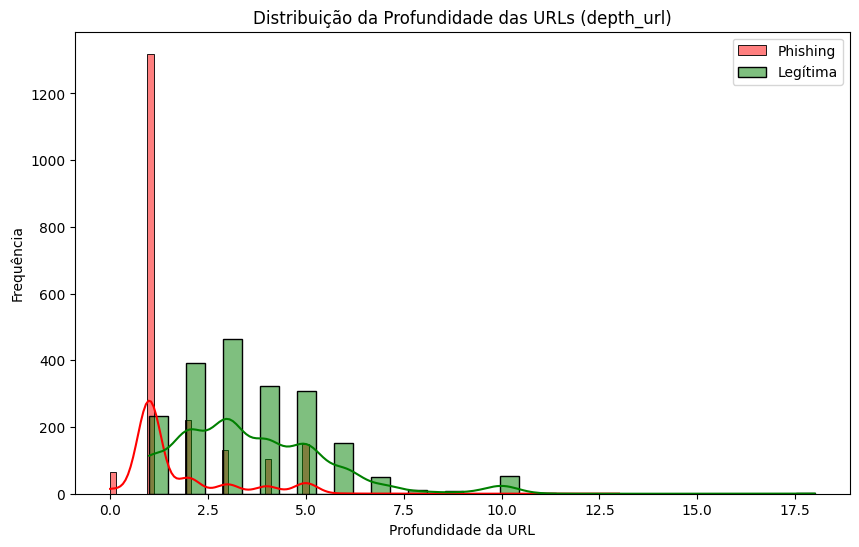

Phishing URLs
count    2000.000000
mean        1.701500
std         1.366137
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        13.000000
Name: depth_url, dtype: float64

Legitimate URLs
count    2000.000000
mean        3.622000
std         1.971563
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        18.000000
Name: depth_url, dtype: float64


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# tratando e analisando a var "depth_url" das URLs de phishing
plt.figure(figsize=(10, 6))
sns.histplot(sample_phishing['depth_url'], kde=True, color='red', label='Phishing')
sns.histplot(sample_legit['depth_url'], kde=True, color='green', label='Legítima')
plt.title('Distribuição da Profundidade das URLs (depth_url)')
plt.xlabel('Profundidade da URL')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Exibir estatísticas descritivas da variável "depth_url" para ambos os subconjuntos
print("Phishing URLs")
print(sample_phishing['depth_url'].describe())
print("\nLegitimate URLs")
print(sample_legit['depth_url'].describe())

In [20]:
# Carregar o arquivo não rotulado
df_not_label = pd.read_csv('https://raw.githubusercontent.com/gabrooo/CP_I_IA_-_Machine_Learning/main/CSV/urls_phishing_checkpoint1_not_label.csv')

# Contar a frequência de domínios no dataset
domain_counts = df_not_label['domain'].value_counts()

# Exibir os domínios com maior frequência
print(domain_counts.head(10))

domain
almardoof.com                                                                       1
bafybeicw5n36ionzo7ijatn32v2vwpyhsxm5wpmq2wcppwbohfmymdlu3y.ipfs.nftstorage.link    1
fazenda.gov.br                                                                      1
distractify.com                                                                     1
mylust.com                                                                          1
docs.google.com                                                                     1
campsite.bio                                                                        1
transxkvv.world                                                                     1
matemcskilpogin.gitbook.io                                                          1
utadc.com                                                                           1
Name: count, dtype: int64


In [21]:
# Calcular a profundidade média das URLs de phishing e legítimas
mean_depth_phishing = sample_phishing['depth_url'].mean()
mean_depth_legit = sample_legit['depth_url'].mean()

# Função para prever se uma URL é phishing com base na profundidade
def predict_phishing(depth_url):
  if depth_url > (mean_depth_phishing + mean_depth_legit) / 2:
    return 1  # Phishing
  else:
    return 0  # Legítima

# Aplicar a função de previsão ao dataset não rotulado
df_not_label['prediction'] = df_not_label['depth_url'].apply(predict_phishing)

# Agrupar por domínio e calcular a precisão da previsão
domain_predictions = df_not_label.groupby('domain')['prediction'].agg(['sum', 'count'])
domain_predictions['accuracy'] = domain_predictions['sum'] / domain_predictions['count']

# Filtrar os domínios com 80% ou mais de precisão
high_accuracy_domains = domain_predictions[domain_predictions['accuracy'] >= 0.8]

# Exibir os domínios com alta precisão
print(high_accuracy_domains)

                 sum  count  accuracy
domain                               
akhbarelyom.com    1      1       1.0
almardoof.com      1      1       1.0
bdnews24.com       1      1       1.0
distractify.com    1      1       1.0
docs.google.com    1      1       1.0
extratorrent.cc    1      1       1.0
fazenda.gov.br     1      1       1.0
mylust.com         1      1       1.0
olx.ro             1      1       1.0
